In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_images = np.loadtxt('./data_mnist/train_images.txt')
train_labels = np.int32(np.loadtxt('./data_mnist/train_labels.txt'))

test_images = np.loadtxt('./data_mnist/test_images.txt')
test_labels = np.int32(np.loadtxt('./data_mnist/test_labels.txt'))

In [3]:
class KnnClasifier:
    def __init__(self, train_images, train_labels):
        self.train_images = train_images
        self.train_labels = train_labels

    def classify_image(self, test_image, num_neighbors=3, metric='l2'):
      # calculez distantele
        if metric.lower() == 'l2':
            distances = np.sqrt(np.sum(((self.train_images - test_image) ** 2),axis=1))
        elif metric.lower() == 'l1':
            distances = np.sum(np.abs(self.train_images - test_image), axis=1)
        else:
            raise Exception("Metric not implemented")

        # sortam distantele - dar avem nevoie doar de indicii acelor pozitii
        sorted_idx = distances.argsort()

        # pastram doar primii k vecini
        sorted_idx = sorted_idx[:num_neighbors]

        # extragem label-urile acelor k vecini
        voting_labels = self.train_labels[sorted_idx]

        return np.bincount(voting_labels).argmax()

    def classify_images(self, test_images, num_neighbors=3, metric='l2'):
        predicted_labels = [self.classify_image(image, num_neighbors, metric) for image in test_images]
        return np.array(predicted_labels)

In [4]:
def accuracy_score(labels, predicted_labels):
    return np.mean(labels == predicted_labels)

In [5]:
model = KnnClasifier(train_images, train_labels)
predictions = model.classify_images(test_images, num_neighbors=3, metric="l2")

In [6]:
acc = accuracy_score(test_labels, predictions)
with open("predictii_3nn_l2_mnist.txt", "w") as f:
  f.write(f"Accuracy is {acc}\n")

In [7]:
acc2 = []
for x in range(1, 10, 2):
  predicted_labels = model.classify_images(test_images, num_neighbors=x, metric="l2")
  acc2.append(accuracy_score(test_labels, predicted_labels))
print(acc2)

[0.884, 0.898, 0.896, 0.88, 0.88]


In [8]:
acc1 = []
for x in range(1, 10, 2):
  predicted_labels = model.classify_images(test_images, num_neighbors=x, metric="l1")
  acc1.append(accuracy_score(test_labels, predicted_labels))
acc1

[0.88, 0.884, 0.868, 0.864, 0.864]

In [9]:
with open("acuratete_l2.txt", "w") as f:
  for x in acc2:
    f.write(f"{x} ")
  f.write("\n")
  for x in acc1:
    f.write(f"{x} ")

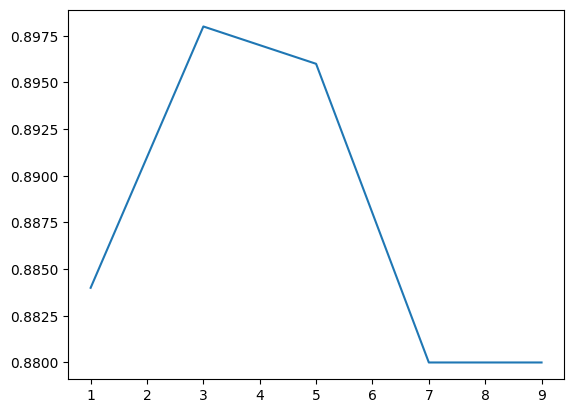

In [10]:
plt.plot([1,3,5,7,9], acc2)
plt.show()

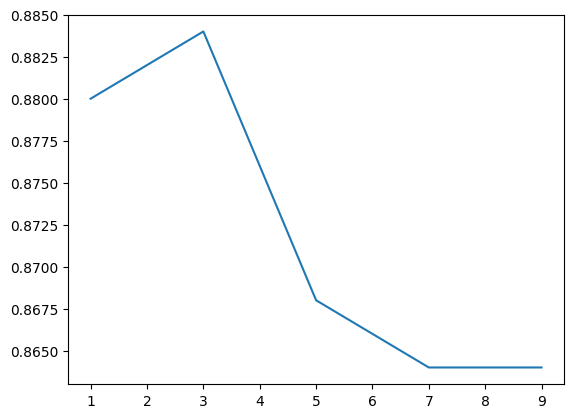

In [11]:
plt.plot([1,3,5,7,9], acc1)
plt.show()
